# SI221 - TP k-Means Vranckx / Thauvin

In [1]:
import numpy as np
import random as rd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random, math
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Exercice 1
### Question 1 & 2 - un centroïd par cluster

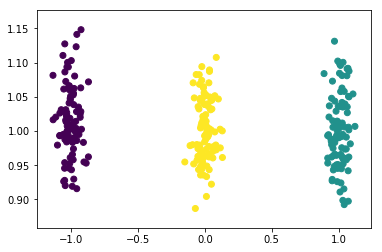

In [118]:
sigma = 0.05
X,Y = make_blobs(n_samples=300, centers=[[-1,1],[1,1],[0,1]], cluster_std=sigma)
plt.scatter(X[:,0], X[:,1],c=Y)

In [3]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
def distance(x1,x2,norme):
  if(norme == 2):
    a = x1[0] - x2[0] 
    b = x1[1] - x2[1]
    return a**2 + b**2
  elif(norme == 1):
    a = np.abs(x1[0] - x2[0])
    b = np.abs(x1[1] - x2[1])
    return np.sqrt(a**2 + b**2)
  

In [4]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
def find_closest_centroid(x, centroids,norme):
  mini = 65535
  closest = 0
  for i in range(len(centroids)):
    dist = distance(x,centroids[i],norme)
    if dist < mini:
      mini = dist
      closest = i
  return closest

In [5]:
def pick_centroids(X,Y,nbr_centroids,random):
    centroids = np.zeros((nbr_centroids,len(X[1])))
    for k in range(nbr_centroids):

      #if random = False, one centroid per cluster, else ramdom
        if(random == False):
          index = np.random.choice([i for i in range(len(Y)) if Y[i] == k])
        else:
          index = np.random.randint(0,len(X))


        centroids[k] = X[index]
    return centroids

centroids = pick_centroids(X,Y,3,False)
print(centroids)

[[-1.03408645  0.9898185 ]
 [ 0.96159868  0.9638574 ]
 [ 0.02649689  1.0590185 ]]


In [6]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
def cost(X,clusters,centroids,norme):
  cost = 0
  for i in range(len(X)):
    cost += distance(X[i],centroids[clusters[i]],norme)
  return cost


#############################################################################
The algorithm converged after 2 iterations!
#############################################################################


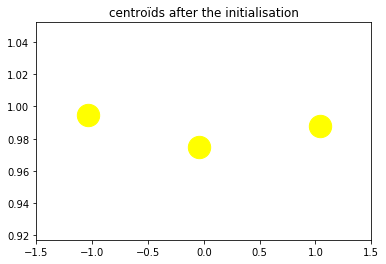

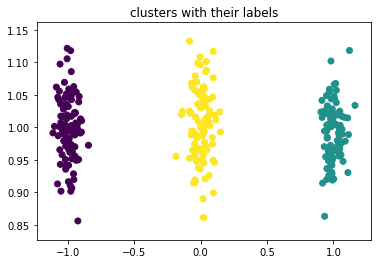

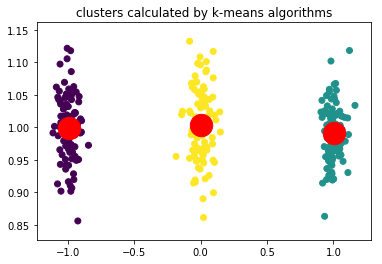

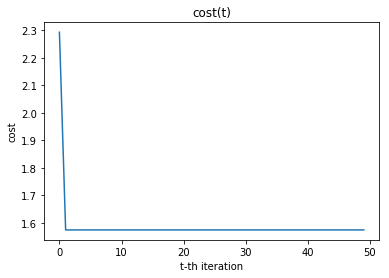

In [7]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
#if random_pick = False, choose one centroid in each cluster, and randomly if True
def kMeans(X,Y, nbr_centroids, nbr_iterations,random_pick,norme):
  '''Run the k-means algorithm
  '''
  centroids = pick_centroids(X,Y,nbr_centroids,random_pick)
  plt.xlim(-1.5,1.5)
  plt.scatter(centroids[:,0], centroids[:,1],c='yellow',s=500)
  plt.title('centroïds after the initialisation')
  clusters = np.zeros(len(X), dtype=int)
  costs = np.zeros(nbr_iterations)
  convergence = -1

  #Run nbr_iterations iterations
  for t in range(nbr_iterations):
    #Classify each sample
    for i in range(len(X)):
      clusters[i] = find_closest_centroid(X[i], centroids,norme)

    costs[t] = cost(X,clusters,centroids,norme)

    if(costs[t] == costs[t-1] and convergence == -1):
      convergence = t
    
    #Update class centers
    sums = np.zeros((nbr_centroids,len(X[1])))
    nbr = np.zeros(nbr_centroids, dtype=int)
    for i in range(len(X)):
      nbr[clusters[i]] += 1
      sums[clusters[i]] += X[i]

    for i in range(len(centroids)):
      centroids[i] = sums[i] / nbr[i]
    
  return clusters,centroids,costs,convergence

clusters,centroids,costs,converge = kMeans(X,Y, 3, 50,False,2)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('clusters with their labels')
plt.figure()
plt.scatter(X[:,0],X[:,1],c=clusters)
plt.scatter(centroids[:,0], centroids[:,1],c='red',s=500)
plt.title('clusters calculated by k-means algorithms')
plt.figure()
plt.title('cost(t)')
plt.xlabel('t-th iteration')
plt.ylabel('cost')
plt.plot(np.arange(0,50),costs)
print('\n#############################################################################')
print('The algorithm converged after ' + str(converge) + ' iterations!')
print('#############################################################################')

### Question 3 - centroïds initialisés aléatoirement


#############################################################################
The algorithm converged after 11 iterations with $\sigma$ = 0.05!
#############################################################################


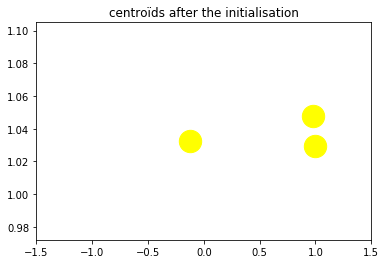

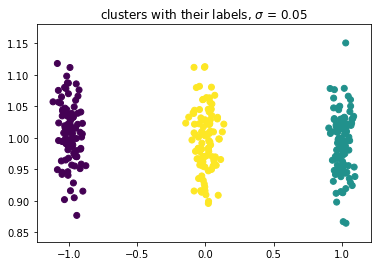

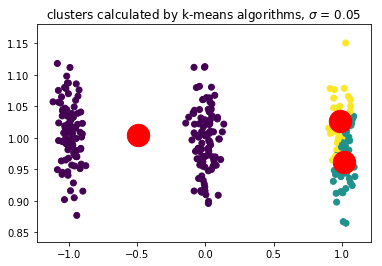

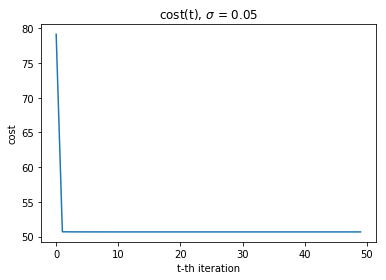

In [120]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
#if random_pick = False, choose one centroid in each cluster, and randomly if True
def kMeans_parameter(sigma,nbr_centroids, nbr_iterations,random,norme):
  X,Y = make_blobs(n_samples=300, centers=[[-1,1],[1,1],[0,1]], cluster_std=sigma)
  clusters,centroids,costs,converge = kMeans(X,Y, nbr_centroids, nbr_iterations,random,norme)
  plt.figure()
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.title('clusters with their labels, $\sigma$ = ' + str(sigma))
  plt.figure()
  plt.scatter(X[:,0],X[:,1],c=clusters)
  plt.scatter(centroids[:,0], centroids[:,1],c='red',s=500)
  plt.title('clusters calculated by k-means algorithms, $\sigma$ = '+str(sigma))
  plt.figure()
  plt.title('cost(t), $\sigma$ = ' + str(sigma))
  plt.xlabel('t-th iteration')
  plt.ylabel('cost')
  plt.plot(np.arange(0,50),costs)
  plt.figure()
    
  print('\n#############################################################################')
  print('The algorithm converged after ' + str(converge) + ' iterations with $\sigma$ = ' + str(sigma) + '!')
  print('#############################################################################')

kMeans_parameter(0.05,3, 50,True,2)


### Question 4 - $\sigma$ ∈  {0.1, 0.2, 0.3}


#############################################################################
The algorithm converged after 19 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 2 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 4 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 7 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 6 iterations with $\sigma$ = 0.2!
#############################################################################

#############################################################################
The algorithm converged after 9 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 9 iterations with $\sigma$ = 0.3!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 7 iterations with $\sigma$ = 0.3!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 7 iterations with $\sigma$ = 0.3!
#############################################################################


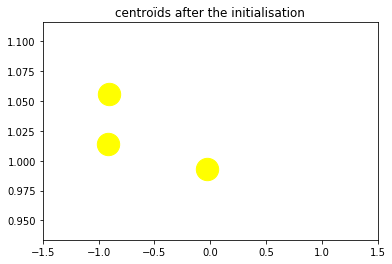

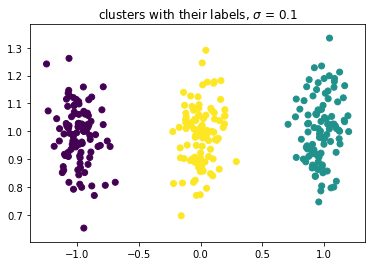

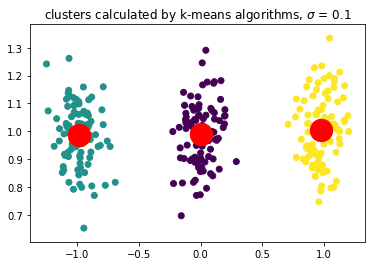

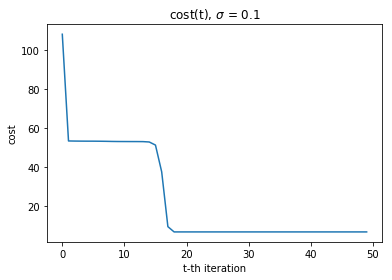

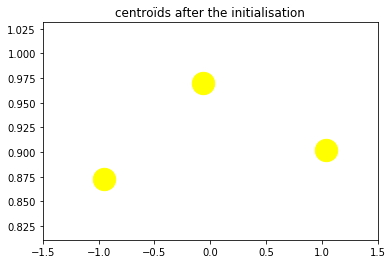

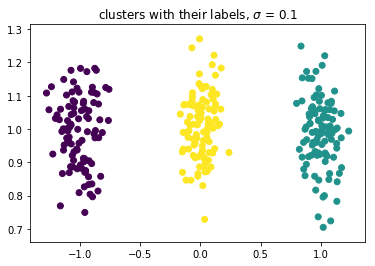

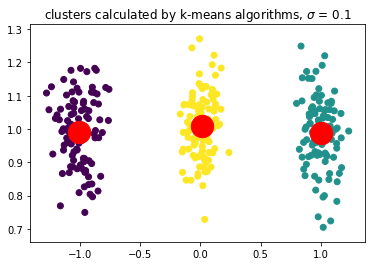

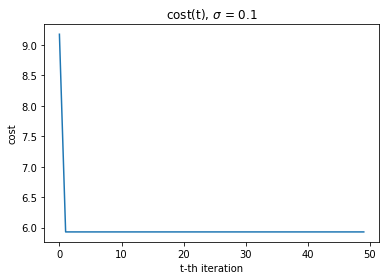

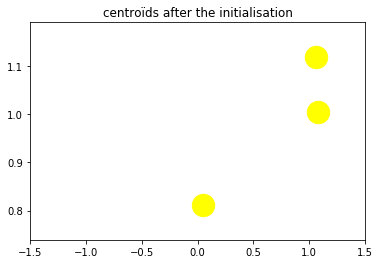

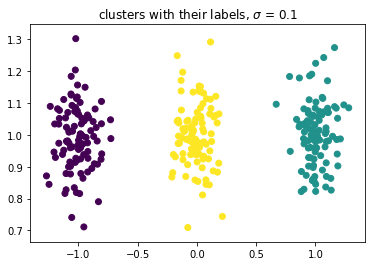

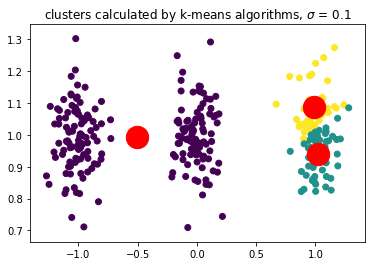

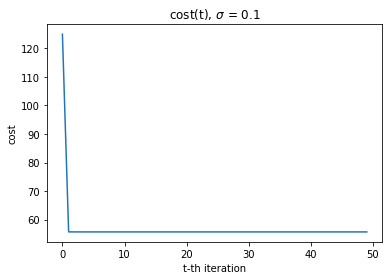

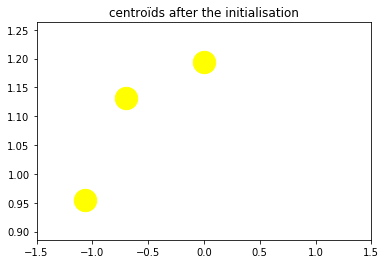

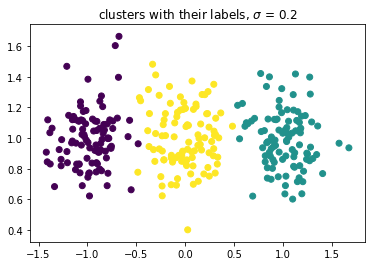

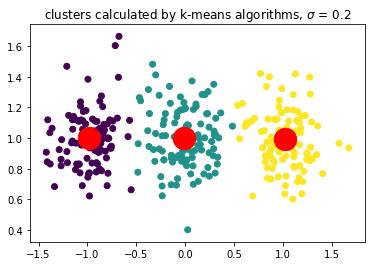

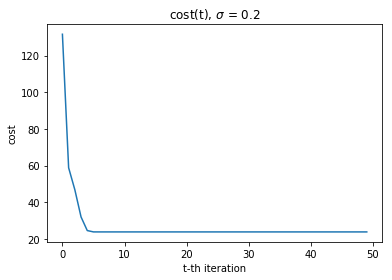

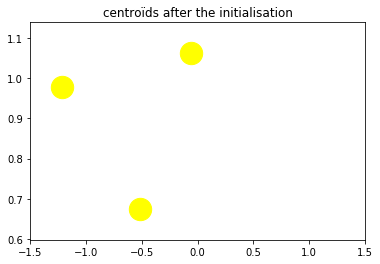

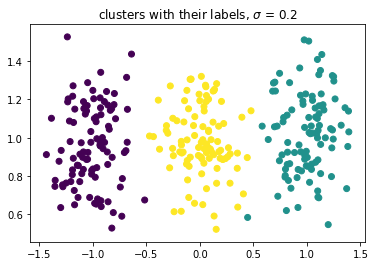

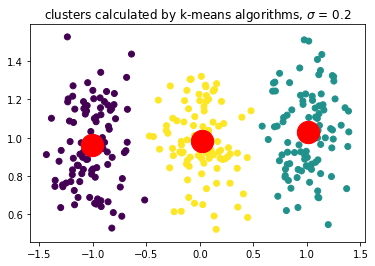

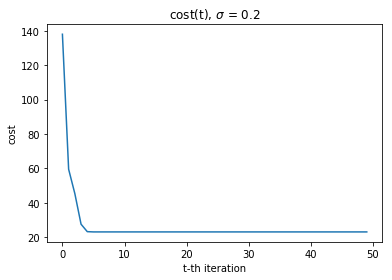

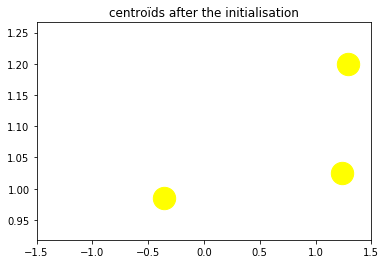

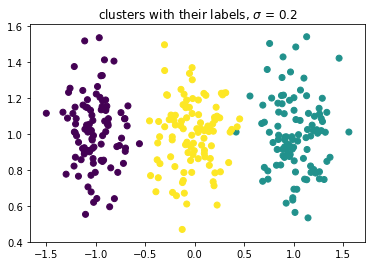

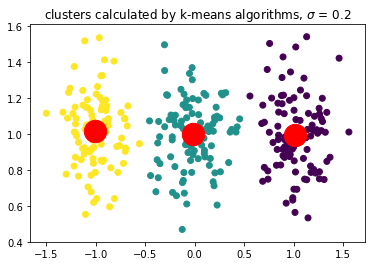

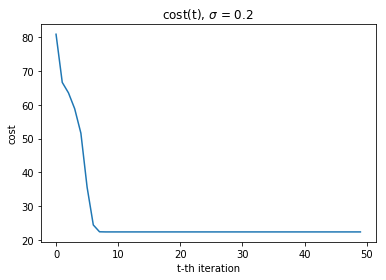

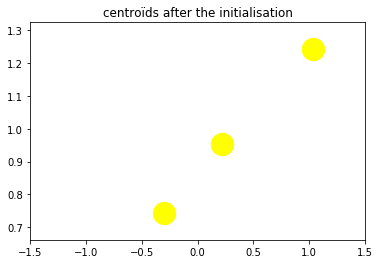

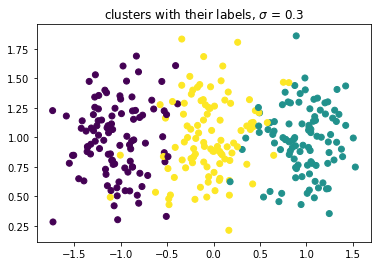

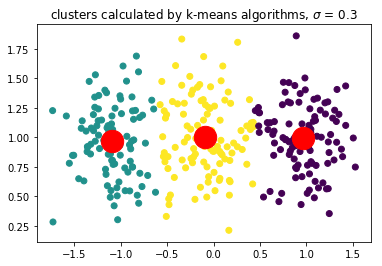

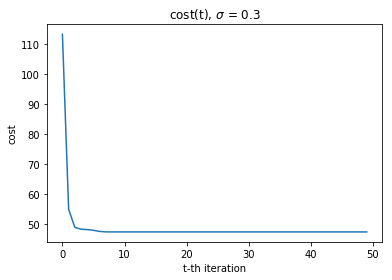

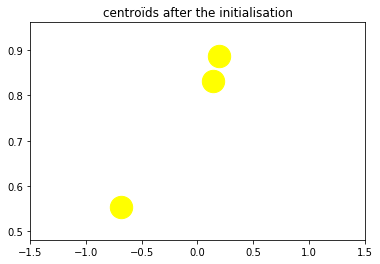

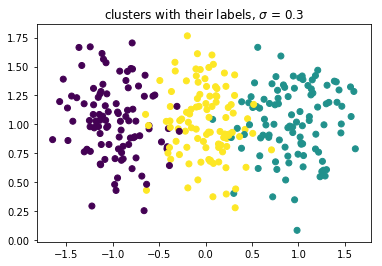

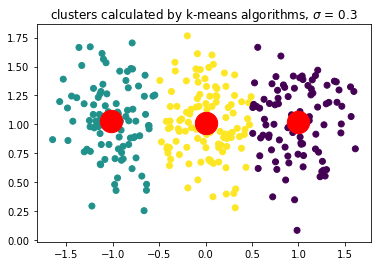

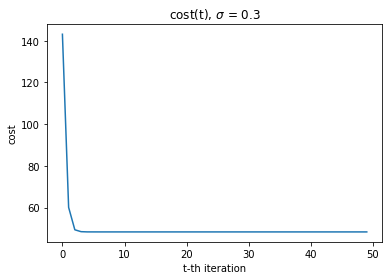

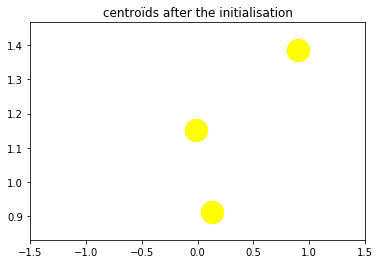

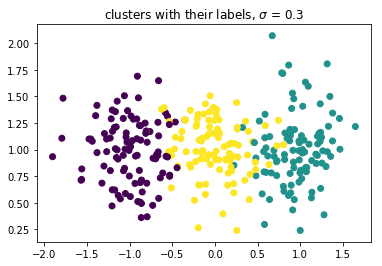

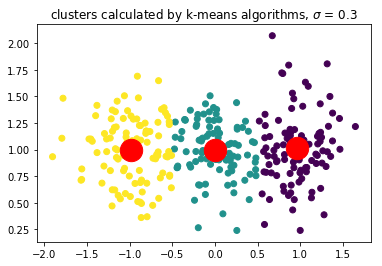

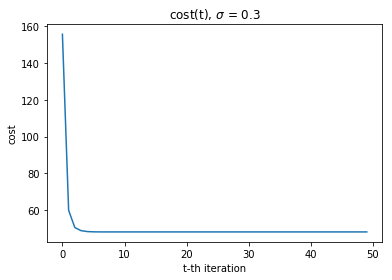

In [121]:
sigmas = [0.1,0.2,0.3]

for sig in sigmas:
    for _ in range(3):
        kMeans_parameter(sig,3, 50,True,2)

### Question 5 - Minimiser le coût avec la norme L2

(Pour un cluster)
$cost(\mu) = \sum_{i = 1}^n || z_i - \mu ||_2^2$ avec $z_i$ les points du cluster et $\mu$ le centroid

On calcule le gradient : $ \nabla cost(\mu) = \sum_{i=1}^n  -2(x_{i}-\mu) $ 

Puis on cherche à l'annuler : $ \nabla f(\mu) = 0 $    si et seulement si    $ n\mu = \sum_{i=1}^n x_{i} $. 

Soit $ \mu = \frac{1}{n}  \sum_{i=1}^n x_{i} $

Cela montre bien que pour minimiser le coût il faut que le centroïd soit la moyenne des points du cluster.

### Question 6 - 
#### (a) Norme L1


#############################################################################
The algorithm converged after 7 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 3 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 16 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 8 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 5 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 7 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 20 iterations with $\sigma$ = 0.3!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 9 iterations with $\sigma$ = 0.3!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 8 iterations with $\sigma$ = 0.3!
#############################################################################


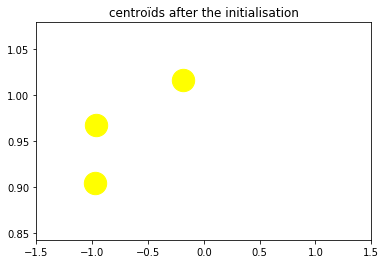

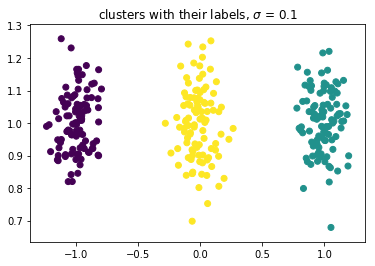

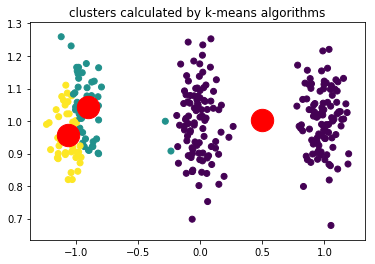

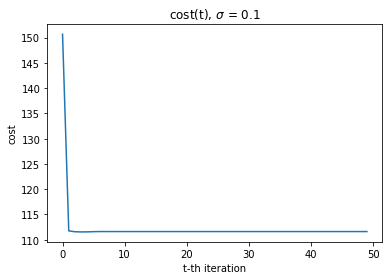

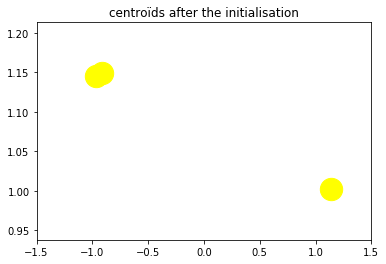

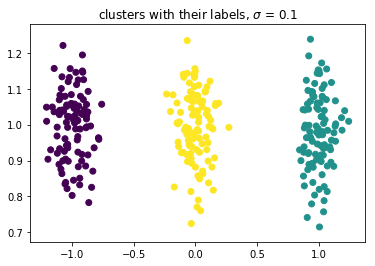

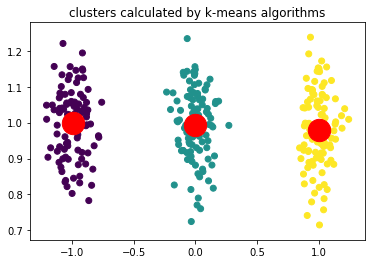

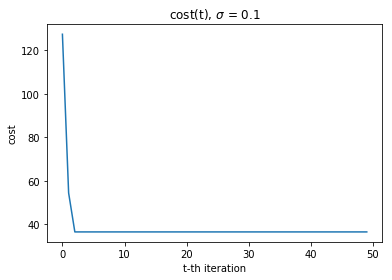

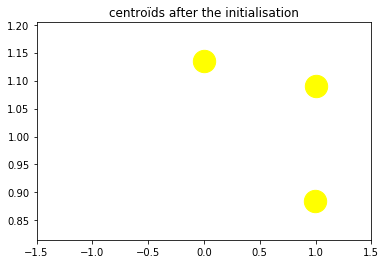

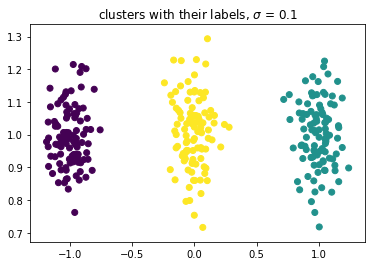

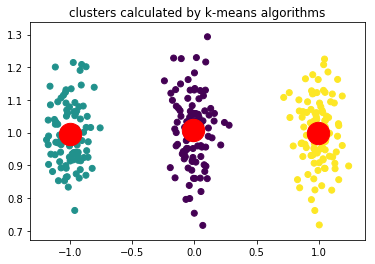

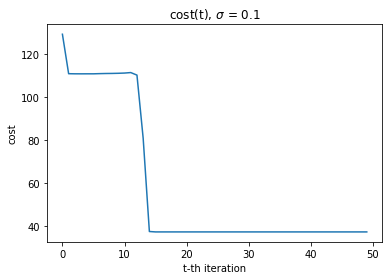

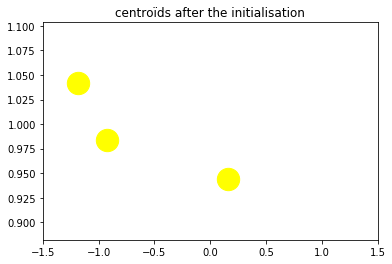

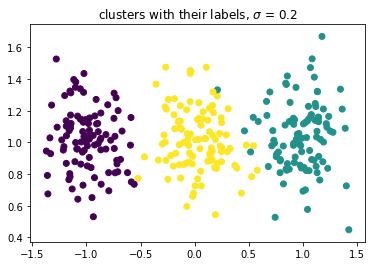

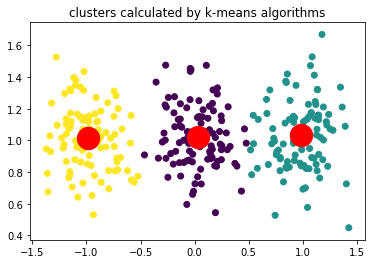

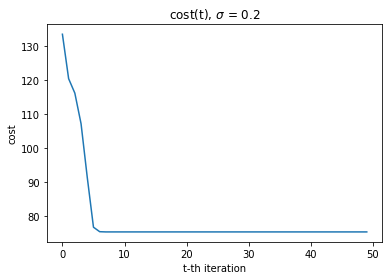

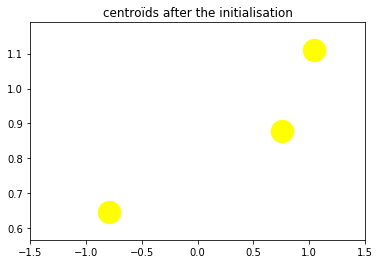

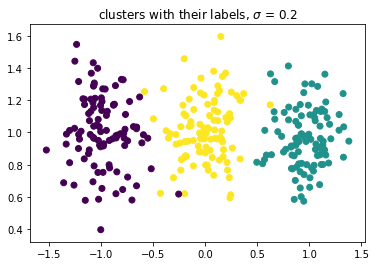

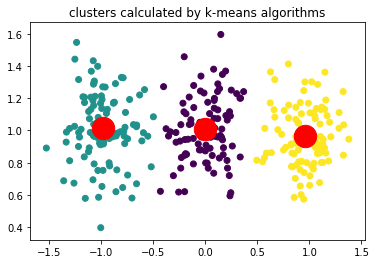

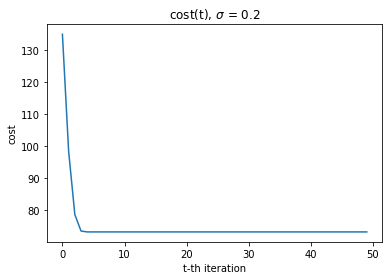

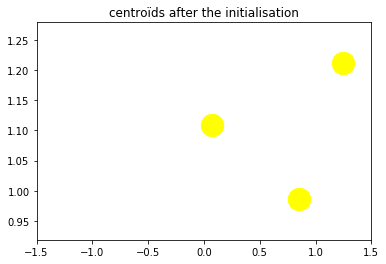

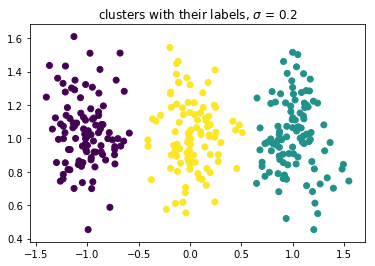

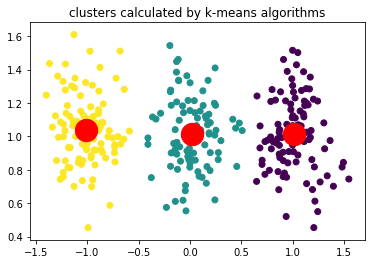

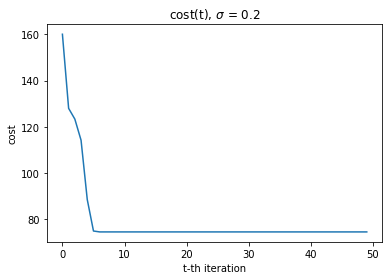

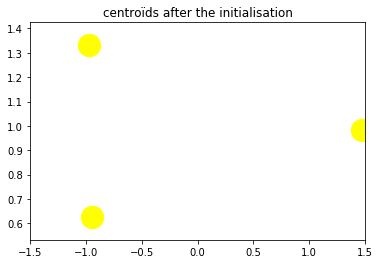

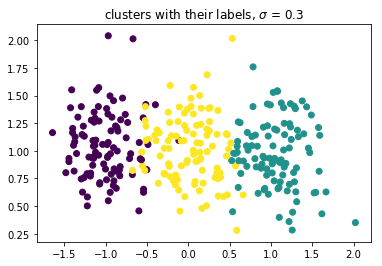

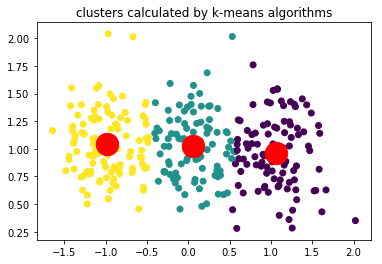

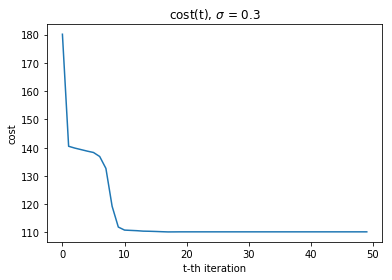

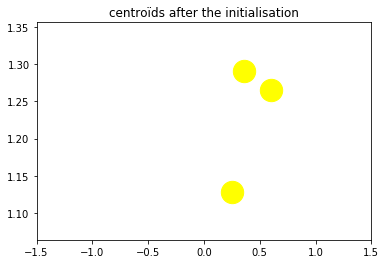

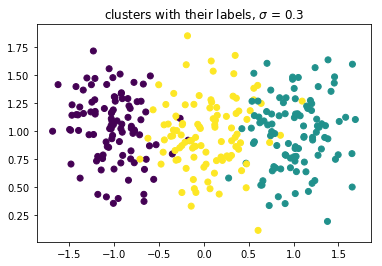

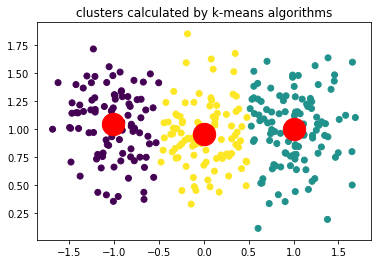

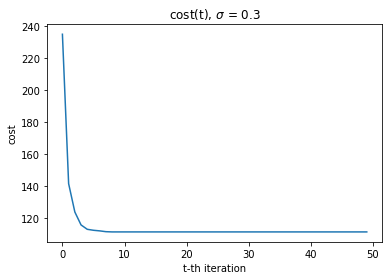

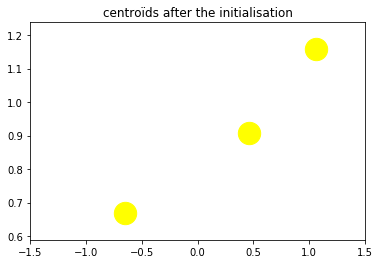

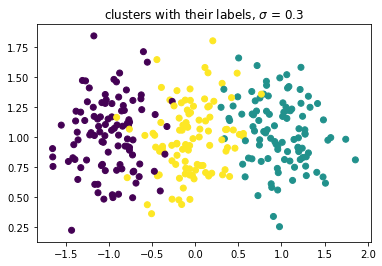

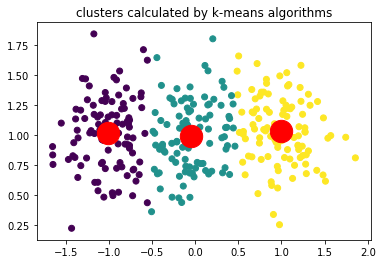

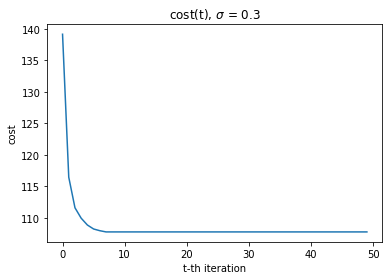

In [12]:
for sig in sigmas:
    for _ in range(3):
        kMeans_parameter(sig,3, 50,True,1)

#### (b) Médiane


#############################################################################
The algorithm converged after 4 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 2 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 8 iterations with $\sigma$ = 0.1!
#############################################################################

#############################################################################
The algorithm converged after 7 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 8 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 6 iterations with $\sigma$ = 0.2!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 5 iterations with $\sigma$ = 0.3!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 14 iterations with $\sigma$ = 0.3!
#############################################################################


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



#############################################################################
The algorithm converged after 7 iterations with $\sigma$ = 0.3!
#############################################################################


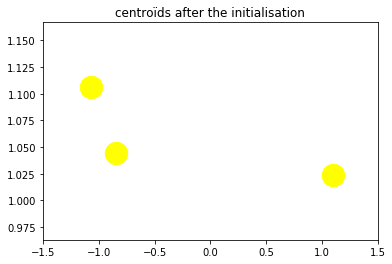

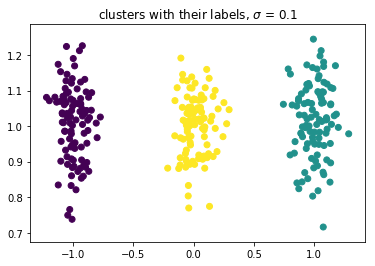

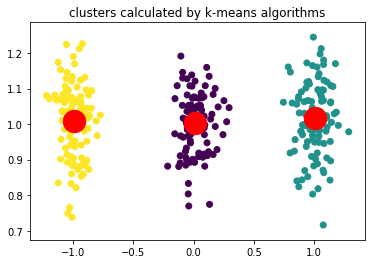

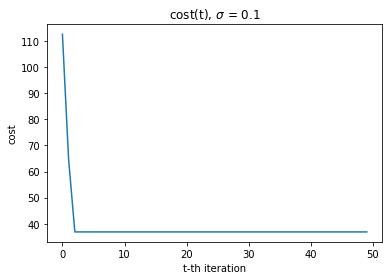

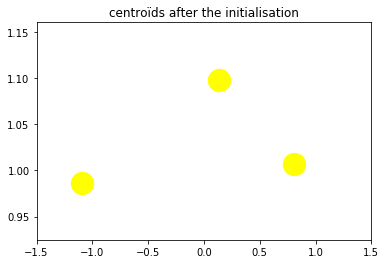

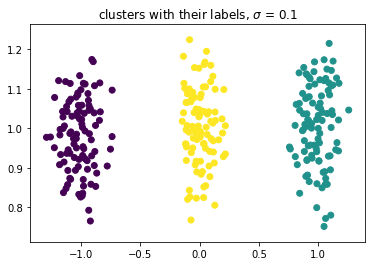

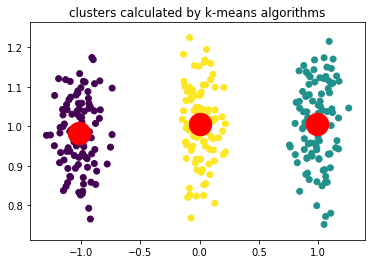

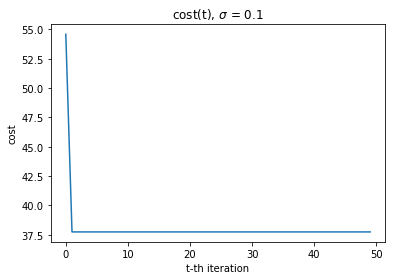

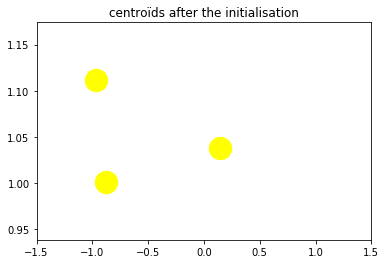

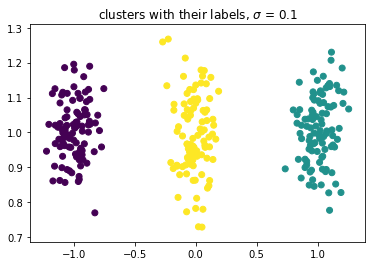

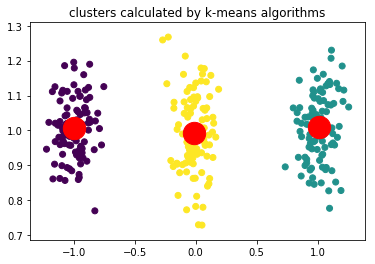

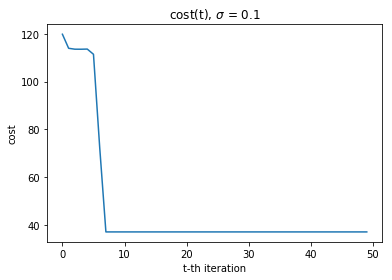

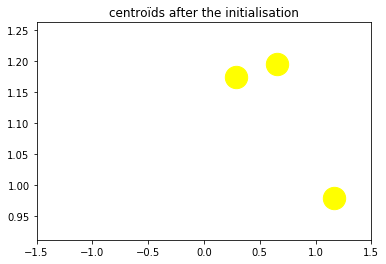

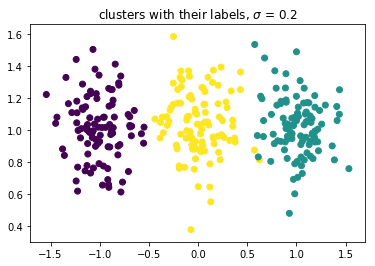

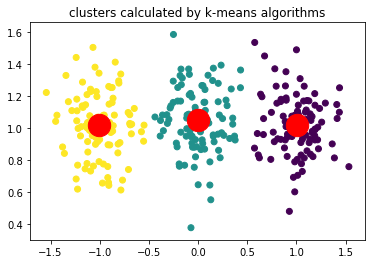

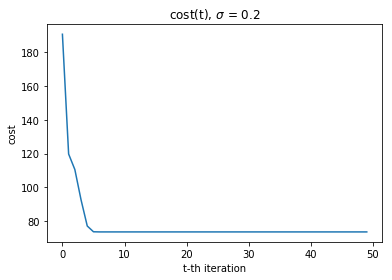

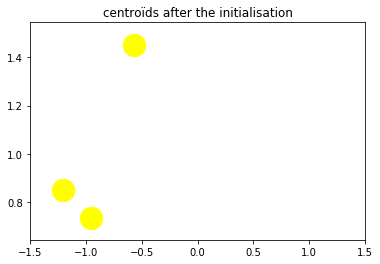

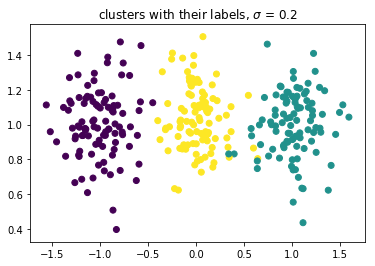

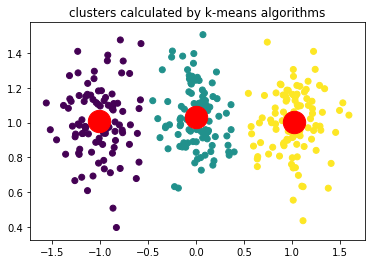

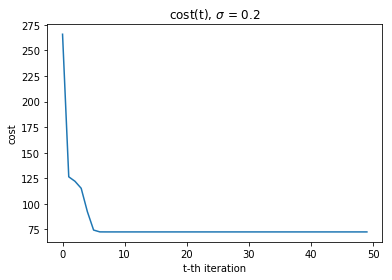

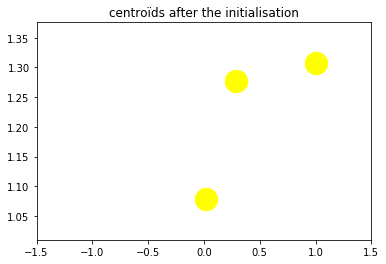

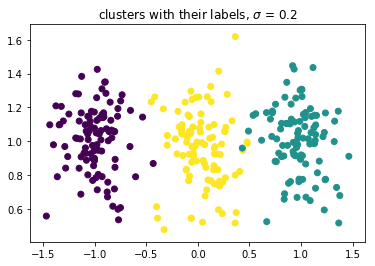

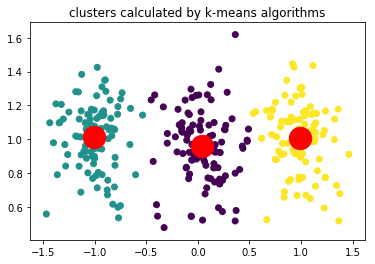

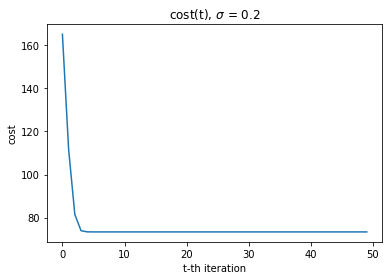

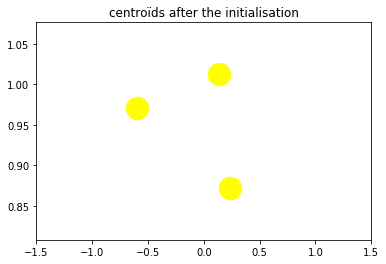

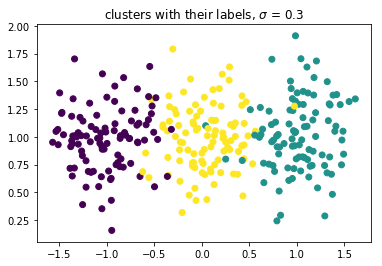

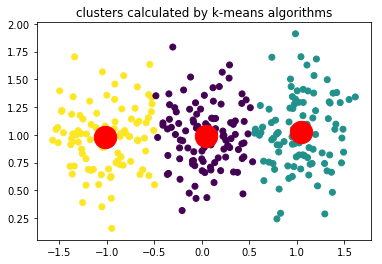

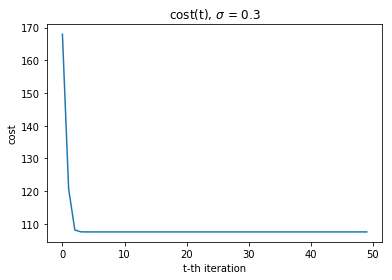

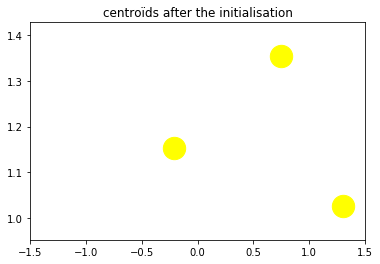

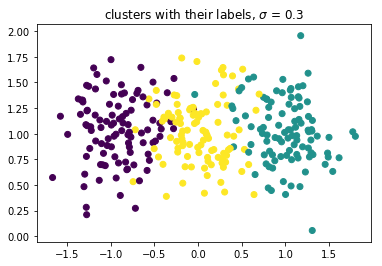

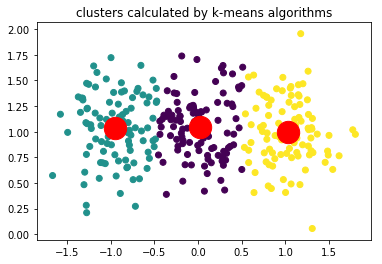

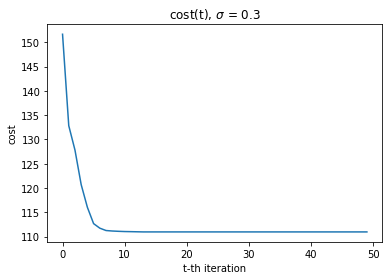

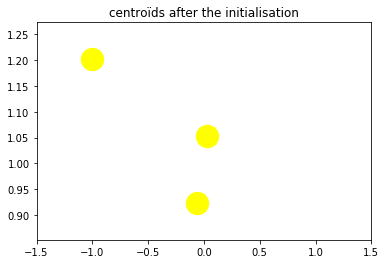

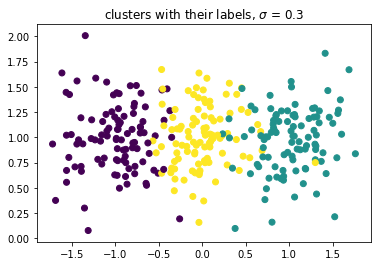

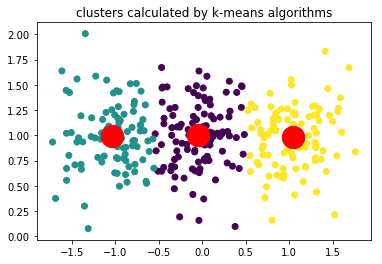

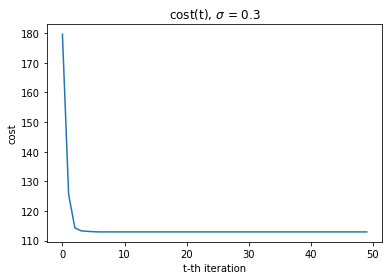

In [115]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
#if random_pick = False, choose one centroid in each cluster, and randomly if True
def kMeans_median(X,Y, nbr_centroids, nbr_iterations,random_pick,norme):
    '''Run the k-means algorithm
    '''
    centroids = pick_centroids(X,Y,nbr_centroids,random_pick)
    plt.xlim(-1.5,1.5)
    plt.scatter(centroids[:,0], centroids[:,1],c='yellow',s=500)
    plt.title('centroïds after the initialisation')
    clusters = np.zeros(len(X), dtype=int)
    costs = np.zeros(nbr_iterations)
    convergence = -1

    #Run nbr_iterations iterations
    for t in range(nbr_iterations):
        #Classify each sample
        for i in range(len(X)):
            clusters[i] = find_closest_centroid(X[i], centroids,norme)

        costs[t] = cost(X,clusters,centroids,norme)

        if(costs[t] == costs[t-1] and convergence == -1):
            convergence = t

        for c in range(len(centroids)):
            clusters_i = X[clusters==c]
            centroids[c] = np.median(clusters_i,axis=0)
            
            

    return clusters,centroids,costs,convergence

#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
#if random_pick = False, choose one centroid in each cluster, and randomly if True
def kMeans_parameter_median(sigma,nbr_centroids, nbr_iterations,random,norme):
    X,Y = make_blobs(n_samples=300, centers=[[-1,1],[1,1],[0,1]], cluster_std=sigma)
    clusters,centroids,costs,converge = kMeans_median(X,Y, nbr_centroids, nbr_iterations,random,norme)
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.title('clusters with their labels, $\sigma$ = ' + str(sigma))
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=clusters)
    plt.scatter(centroids[:,0], centroids[:,1],c='red',s=500)
    plt.title('clusters calculated by k-means algorithms')
    plt.figure()
    plt.title('cost(t), $\sigma$ = ' + str(sigma))
    plt.xlabel('t-th iteration')
    plt.ylabel('cost')
    plt.plot(np.arange(0,50),costs)
    plt.figure()
    print('\n#############################################################################')
    print('The algorithm converged after ' + str(converge) + ' iterations with $\sigma$ = ' + str(sigma) + '!')
    print('#############################################################################')

for sig in sigmas:
    for _ in range(3):
        kMeans_parameter(sig,3, 50,True,1)

***Résultats*** : on peut voir que l'algorithme converge plus rapidement dans ce cas si on compare aux résultats de la question précédente.

#### (c) - Minimiser le coût avec la norme L
(Pour un cluster)
$cost(\mu) = \sum_{i = 1}^n || z_i - \mu ||_1^2$ avec $z_i$ les points du cluster et $\mu$ le centroid

On calcule la dérivée $ \ f'(\mu) = -1*| \left\{ i : x_{i} < \mu \right\} | +1*|\left\{ i : x_{i} > \mu \right\} | $

Et on cherche à l'annuler : $ f'(\mu) = 0 $    si et seulement si $ | \left\{ i : x_{i} < \mu \right\} | = |\left\{ i : x_{i} > \mu \right\} |$

Minimiser le coût revient donc à prendre la médianne de chaque cluster.